<a href="https://colab.research.google.com/github/razzlestorm/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Jerimiah_Willhite_Linear_Algebra_Sprint_Challenge_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

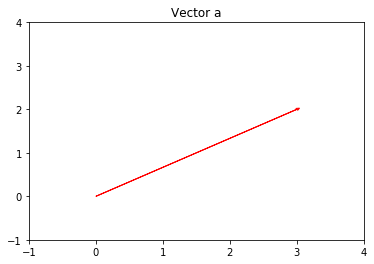

In [3]:
plt.arrow(0,0, 3, 2,head_width=.05, head_length=0.05, color ='red')
plt.xlim(-1,4)          
plt.ylim(-1,4)
plt.title('Vector a')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [5]:
b = np.array([17, -4, -2, 1])
print(np.linalg.norm(b))
#The norm represents the square root of the sum of the squared elements of a vector, and is also known as its magnitude or length

17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [7]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])
print(np.dot(c, d))

#No, vectors are only orthogonal if their dot product = 0.

42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [12]:
E = np.matrix([[7, 4, 2],
              [1, 3, -1],
              [2, 6, -4]])

print(f"The inverse of E is:\n\n{np.linalg.inv(E)} \n\n")
print(f"The transpose of of E is:\n\n{np.transpose(E)}")

The inverse of E is:

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]] 


The transpose of of E is:

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [20]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head(7)

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0
5,1450,6
6,1600,4


In [0]:
#"Importing" code from the homework just because it's faster than looking up np functions
def sqrt(number):
  return number**(1/2)

def mean(data_arr):
  return sum(data_arr)/len(data_arr)

def variance(data_arr):
  return sum((x - mean(data_arr)) ** 2 for x in data_arr) / len(data_arr)

def stdev(data_arr):
  return sqrt(variance(data_arr))

In [17]:
##### Your Code Here #####
customers_mean = mean(df['customers'])
customers_variance = variance(df['customers'])
customers_std = stdev(df['customers'])
snow_mean = mean(df['snow'])
snow_variance = variance(df['snow'])
snow_std = stdev(df['snow'])

print(f'Mean, Variance, and Standard Deviation of Customers column: {customers_mean}, {customers_variance}, {customers_std}')
print(f'Mean, Variance, and Standard Deviation of Snow column: {snow_mean}, {snow_variance}, {snow_std}')

Mean, Variance, and Standard Deviation of Customers column: 1135.7142857142858, 84653.06122448981, 290.95199127087926
Mean, Variance, and Standard Deviation of Snow column: 2.7142857142857144, 7.346938775510203, 2.7105237087157534


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [21]:
df.corr()

#If by comparable do you mean are they correlated, the data would suggest there is a good chance they are. The more snow falls, the more customers there tend to be.


,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [18]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [74]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
print(df.shape)
df.head()

(4, 18)


,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [81]:
scaled_features = df.copy()
features = scaled_features.loc[:, scaled_features.columns != 'Country']
scaler = StandardScaler().fit(features)
###############I can't see a different between with_mean=False or True, so I think this is right, based on the StandardScaler documentation? Not super sure, but leaving it for now#############
print(scaler)
print(scaler.mean_)
print(scaler.scale_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[  94.25  245.25  706.    130.5   205.25  154.25  798.25  208.    457.75
  202.    349.    967.5  1502.5    57.5  1427.    360.75   55.25]
[ 16.33056949  14.28941916  80.91044432  25.59785147  19.36975736
  13.40475662 173.85967761  52.12485012  80.08237946  11.89537725
  13.65650028 182.3958607   47.33656092   9.63068014 121.77438154
 135.7173073    9.03811374]


         0         1         2   ...        14        15        16
0  0.658275 -0.017495 -0.259546  ... -0.435231  0.104998 -0.138303
1  0.535805 -1.277169  1.198856  ... -1.404236  0.841823  0.968122
2  0.535805 -0.227441  0.543811  ...  1.190727  0.716563  0.746837
3 -1.729885  1.522105 -1.483121  ...  0.648741 -1.663384 -1.576656

[4 rows x 17 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


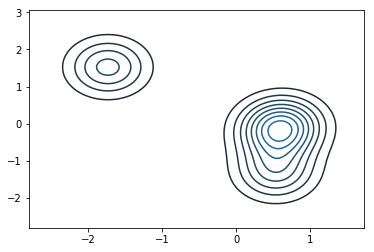

In [82]:
scaled = pd.DataFrame(scaler.transform(features))
print(scaled.head())
sns.kdeplot(scaled)    ####### <- I'm not sure what I did here with a density plot but it's cool? FURTHER RESEARCH REQUIRED #############

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

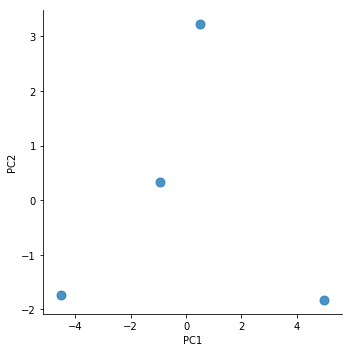

In [97]:
pca = PCA(2) #number of Principle Components to reduce to
pca.fit(scaled)
pc_df = pd.DataFrame(pca.transform(scaled), columns=['PC1', 'PC2'])

sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  legend=True,
  scatter_kws={"s": 80}); #Seaborn has this, but I suppose the more traditional way to do it is below?



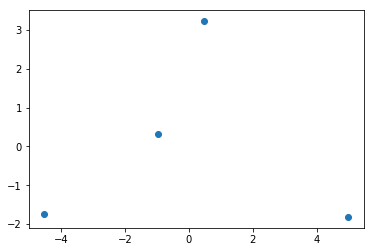

In [96]:
plt.scatter(pc_df['PC1'], pc_df['PC2'])

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [132]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
print(points.shape)
points.head()

(200, 2)


,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


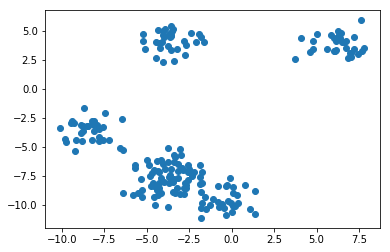

In [133]:
plt.scatter(points['x'], points['y'])   
#Eyeballing!

In [0]:
#Looks like five should be decent, an argument could be made for four
kmeans = KMeans(n_clusters=5).fit(points)
#Adding the labels to points df as a column
labels = kmeans.labels_
new_series = pd.Series(labels)
points['cluster'] = new_series.values


In [0]:
#This means five centroids! If we were doing it manually, but let's not!
#centroids = points.sample(5)

In [135]:
#quick check:
print(points.head())


          x         y  cluster
0 -7.846803 -3.421277        3
1 -3.554323 -6.884729        4
2 -0.192822 -9.671030        0
3 -6.401456 -5.223972        3
4 -0.804026 -9.704457        0


In [0]:
#Functions that we used from class! Forgive me for not handwriting it all out again, but I know what they do!

def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3: 'blue', 4: 'purple'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[3].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[4].y, "ok")
  
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()


def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2,3,4])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean(), df.x[df[column_header]==3].mean(), df.x[df[column_header]==4].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean(), df.y[df[column_header]==3].mean(), df.y[df[column_header]==4].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)

In [140]:
find_nearest_centroid(points, centroids).head()

,x,y,cluster,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5
0,-7.846803,-3.421277,3,2,2,2,2,2,2
1,-3.554323,-6.884729,4,0,0,0,0,0,0
2,-0.192822,-9.671030,0,0,0,0,0,0,0
3,-6.401456,-5.223972,3,0,0,0,0,0,0
4,-0.804026,-9.704457,0,0,0,0,0,0,0


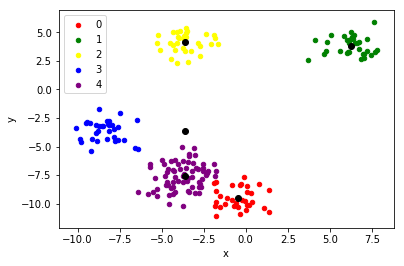

In [143]:
centroids = get_centroids(points, 'cluster')
plot_clusters(points, 'cluster', centroids)
####The centroid for cluster 3 must have a higher average than usual? Sort of strange, or maybe it's some sort of visualization issue?

In [0]:
#LET'S DO IT ALL BY HAND WOOOO, One iteration at a time
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')

centroids = points.sample(5, random_state=442)

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df


#defining first pass
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')

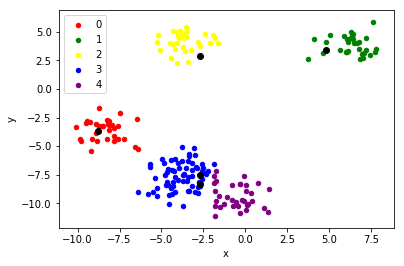

In [226]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow', 3:'blue', 4:'purple'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[3].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[4].y, "ok")

  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

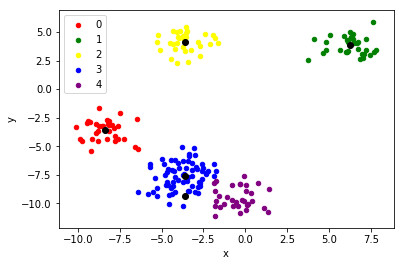

In [227]:

def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

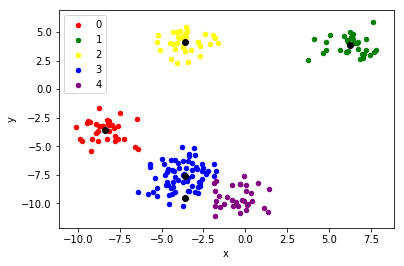

In [228]:
# Calculate New Centroids
centroids = get_centroids(second_pass, 'cluster_2')

# Get Clusters for New Centroids
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

# Plot New Cluster
plot_clusters(third_pass, 'cluster_3', centroids)

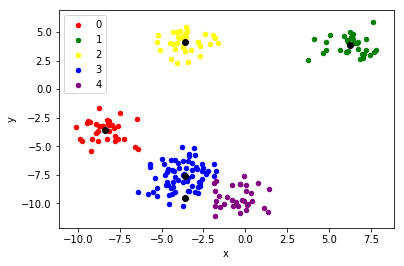

In [230]:
# Calculate New Centroids
centroids = get_centroids(third_pass, 'cluster_3')

# Get Clusters for New Centroids
fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

# Plot New Cluster
plot_clusters(fourth_pass, 'cluster_4', centroids)

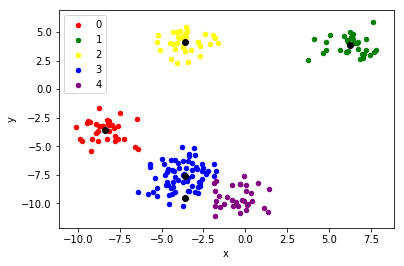

In [231]:
# Calculate New Centroids
centroids = get_centroids(fourth_pass, 'cluster_4')

# Get Clusters for New Centroids
fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

# Plot New Cluster
plot_clusters(fifth_pass, 'cluster_5', centroids)

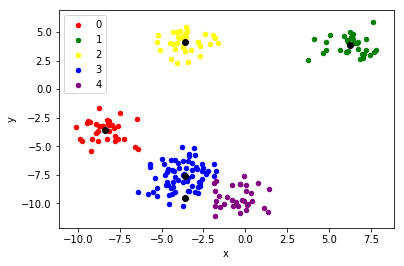

In [232]:
# Calculate New Centroids
centroids = get_centroids(fifth_pass, 'cluster_5')

# Get Clusters for New Centroids
sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

# Plot New Cluster
plot_clusters(sixth_pass, 'cluster_6', centroids)

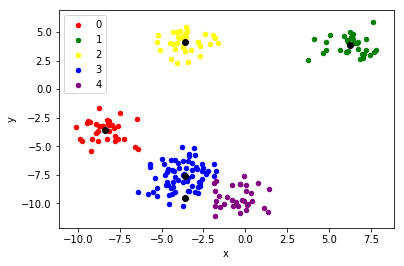

In [233]:
# Calculate New Centroids
centroids = get_centroids(sixth_pass, 'cluster_6')

# Get Clusters for New Centroids
seventh_pass = find_nearest_centroid(sixth_pass.select_dtypes(exclude='int64'), centroids, '7')

# Plot New Cluster
plot_clusters(seventh_pass, 'cluster_7', centroids)

In [234]:
convergence = np.array_equal(sixth_pass['cluster_6'], seventh_pass['cluster_7'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  True


In [0]:
#Got pretty close using the display of all the iterations, but the centroid is still off?